# Comparison between triaxial ellipsoid and prolate ellipsoid

### Import the required modules and functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from fatiando import mesher, gridder, utils
from fatiando.gravmag import triaxial_ellipsoid, prolate_ellipsoid

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Set some parameters for modelling

In [2]:
# The local-geomagnetic field
F, inc, dec = 60000., 50., 20.

# boundaries of the study area
bounds = [-5000, 5000, -4000, 6000, 0, 5000]

# Create a regular grid at 100m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=0)

### Triaxial ellipsoid versus prolate ellipsoid

This test compares the total-field anomalies produced by a triaxial ellipsoid with that produced by a prolate ellipsoid. The triaxial ellipsoid has semi-axes $a$, $b$, and $c$ equal to `800 m`, `401 m`, and `399 m`, respectively, and the prolate ellipsoid has semi-axes $a$ and $b$ equal to `800 m` and `400 m`, respectively. Both bodies are centered at the point `(0, 1000, 2000)`.

##### Triaxial ellipsoid

In [3]:
triaxial = mesher.TriaxialEllipsoid(0, 1000, 2000,
                                    800, 401, 399,
                                    180*np.random.rand(), 0, 90*np.random.rand(),
                                    {'remanence': [2, 64, -9],
                                     'k': [0.01, 0.01, 0.01, 0, 90, 90]})

In [4]:
# magnetization

V_t = triaxial_ellipsoid.V(triaxial.alpha,
                           triaxial.gamma,
                           triaxial.delta)
n11_t, n22_t, n33_t = triaxial_ellipsoid.demag_factors(triaxial.a,
                                                       triaxial.b,
                                                       triaxial.c)
suscep_t = triaxial_ellipsoid.K(triaxial.props['k'][0],
                                triaxial.props['k'][1],
                                triaxial.props['k'][2],
                                triaxial.props['k'][3],
                                triaxial.props['k'][4],
                                triaxial.props['k'][5])
mag_t = triaxial_ellipsoid.magnetization(n11_t, n22_t, n33_t, suscep_t, F, inc, dec,
                                         triaxial.props['remanence'][0],
                                         triaxial.props['remanence'][1],
                                         triaxial.props['remanence'][2], V_t)

In [5]:
print utils.vec2ang(np.dot(V_t, mag_t))

[2.4568119424798347, 61.885863158336697, -1.6406805591767728]


##### Prolate ellipsoid

In [6]:
prolate = mesher.ProlateEllipsoid(0, 1000, 2000,
                                  800, 400,
                                  triaxial.alpha, triaxial.delta,
                                  {'remanence': [2, 64, -9],
                                   'k': [0.01, 0.01, 0.01, 0, 90]})

In [7]:
# magnetization

V_p = prolate_ellipsoid.V(prolate.alpha,
                          prolate.delta)
n11_p, n22_p = prolate_ellipsoid.demag_factors(prolate.a,
                                               prolate.b)
suscep_p = prolate_ellipsoid.K(prolate.props['k'][0],
                               prolate.props['k'][1],
                               prolate.props['k'][2],
                               prolate.props['k'][3],
                               prolate.props['k'][4])
mag_p = prolate_ellipsoid.magnetization(n11_p, n22_p, suscep_p, F, inc, dec,
                                        prolate.props['remanence'][0],
                                        prolate.props['remanence'][1],
                                        prolate.props['remanence'][2], V_p)

In [8]:
print utils.vec2ang(np.dot(V_p, mag_p))

[2.4568110195200461, 61.885862797499598, -1.6403790231491704]


##### Orientation

In [9]:
V_t = triaxial_ellipsoid.V(triaxial.alpha,
                           triaxial.gamma,
                           triaxial.delta)
V_p = prolate_ellipsoid.V(prolate.alpha,
                          prolate.delta)
np.allclose(V_t, V_p)

True

##### Total-field anomalies

In [10]:
# total-field anomaly produced by the triaxial ellipsoid (in nT)
tf_t = triaxial_ellipsoid.tf(xp, yp, zp, [triaxial],
                             F, inc, dec)

# total-field anomaly produced by the prolate ellipsoid (in nT)
tf_p = prolate_ellipsoid.tf(xp, yp, zp, [prolate],
                            F, inc, dec)

# residuals
tf_r = tf_t - tf_p

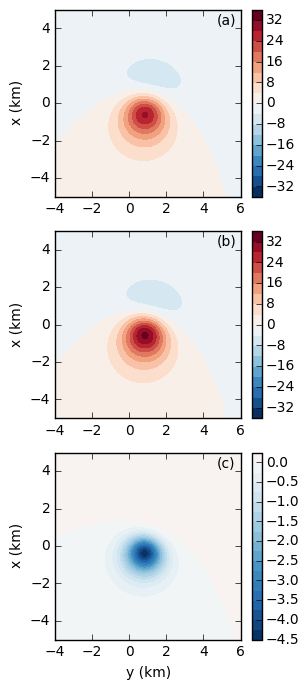

In [16]:
plt.figure(figsize=(3.15, 7))
plt.axis('scaled')

ranges = np.max(np.abs([np.min(tf_t), np.max(tf_t),
                        np.min(tf_p), np.max(tf_p)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.subplot(3,1,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_p.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(tf_r), np.max(tf_r)]))
plt.subplot(3,1,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_r.reshape(shape), 20, cmap = cmap, 
             vmin = -ranges, vmax = ranges)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(c)', xy=(0.88,0.92), 
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.tight_layout()
plt.savefig('..\\manuscript\\figures\\fields_triaxial_prolate.pdf', facecolor='w', bbox_inches='tight')

plt.show()

##### Field components

In [17]:
# field components produced by the triaxial ellipsoid (in nT)
bx_t = triaxial_ellipsoid.bx(xp, yp, zp, [triaxial],
                             F, inc, dec)
by_t = triaxial_ellipsoid.by(xp, yp, zp, [triaxial],
                             F, inc, dec)
bz_t = triaxial_ellipsoid.bz(xp, yp, zp, [triaxial],
                             F, inc, dec)

# field components produced by the prolate ellipsoid (in nT)
bx_p = prolate_ellipsoid.bx(xp, yp, zp, [prolate],
                            F, inc, dec)
by_p = prolate_ellipsoid.by(xp, yp, zp, [prolate],
                            F, inc, dec)
bz_p = prolate_ellipsoid.bz(xp, yp, zp, [prolate],
                            F, inc, dec)

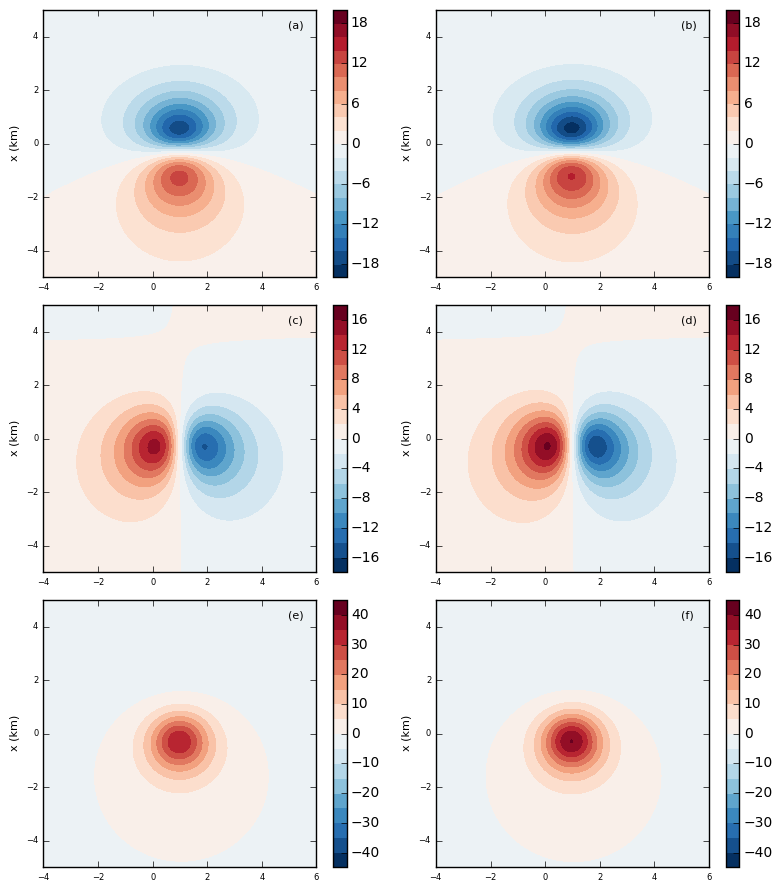

In [18]:
#plt.figure(figsize=(3.27, 1.5))
plt.figure(figsize=(8, 9))
plt.axis('scaled')

ranges = np.max(np.abs([np.min(bx_t), np.max(bx_t),
                        np.min(bx_p), np.max(bx_p)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,2,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)
plt.subplot(3,2,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_p.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)

ranges = np.max(np.abs([np.min(by_t), np.max(by_t),
                        np.min(by_p), np.max(by_p)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,2,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(c)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)
plt.subplot(3,2,4)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_p.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(d)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)

ranges = np.max(np.abs([np.min(bz_t), np.max(bz_t),
                        np.min(bz_p), np.max(bz_p)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,2,5)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(e)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)
plt.subplot(3,2,6)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_p.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(f)', xy=(0.90,0.93), 
              xycoords = 'axes fraction', color='k',
              fontsize=8)

plt.tight_layout()
#plt.savefig('..\\manuscript\\figures\\fields_triaxial_sphere.pdf', facecolor='w', bbox_inches='tight')